In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warning .filterwarnings('ignore')

NameError: name 'warning' is not defined

In [3]:
df=pd.read_csv(r'C:\Users\USER\Documents\dataset\Sleep_health_and_lifestyle_dataset.csv')

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [6]:
df.isnull().sum()
# checking for missing values

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [20]:
df.duplicated().sum()
# checking for duplicates

0

In [7]:
#size of the dataset
df.shape

(374, 13)

In [11]:
df_na=df.fillna('unknown',inplace=True)
# imputating the missing values

In [12]:
df['Sleep Disorder'].unique()

array(['unknown', 'Sleep Apnea', 'Insomnia'], dtype=object)

<Axes: ylabel='Sleep Disorder'>

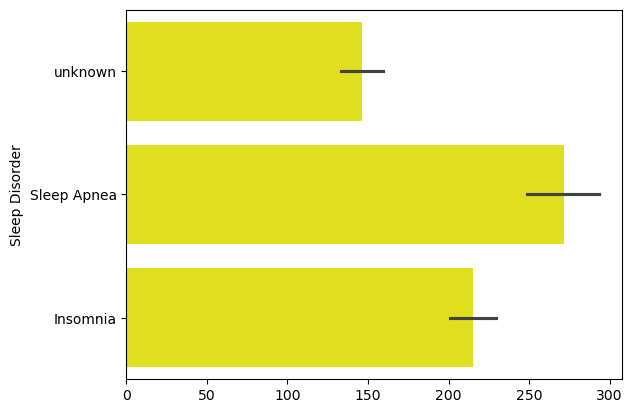

In [18]:
# visualizing the target feature
sns.barplot(df['Sleep Disorder'],color='yellow')

# Hypothesis / statistical testing

### 1) Hypothesis: Sleep apnea is more prevalent in males than in females.

## h0:Sleep apnea is more prevalent in males than in females
## h1:Sleep apnea is not more prevalent in males than in females

In [46]:
apnea_male=df[(df['Gender'] == 'Male') & (df['Sleep Disorder'] == 'Sleep Apnea')].sum()
apnea_female=df[(df['Gender'] == 'Female') & (df['Sleep Disorder'] == 'Sleep Apnea')].sum()

In [52]:
len(apnea_male),len(apnea_female)

(13, 13)

In [47]:
from scipy.stats import chi2_contingency

In [66]:
table=pd.crosstab(apnea_male,apnea_female)

In [51]:
stat,p,dof,expected=chi2_contingency(table)
print(stat,p)
if p>0.05:
    print('yes')
else:
    print ('no')

156.0 0.23349082351103725
yes


## or

In [70]:
m=df[df['Gender']=='Male']
f=df[df['Gender']=='Female']

In [71]:
len(m),len(f)

(189, 185)

## the sleep apnea is more in males than females

## 2) Hypothesis: The prevalence of sleep apnea increases with age.

## h0:The prevalence of sleep apnea increases with age.
## h1:The prevalence of sleep apnea does not increase with age.

In [85]:
slp_apnea=df[df['Sleep Disorder']=='Sleep Apnea'].value_counts()
# filtering the apnea variable

In [80]:
from scipy.stats import ttest_ind

In [84]:
stat,p=ttest_ind(df['Age'],slp_apnea)
print(stat,p)
if p>0.05:
    print('yes')
else:
    print('no')

41.90090562670128 1.9947382102342173e-157
no


## result: the prevalence of sleep apnea does not increase with age.

## 3) Hypothesis: Individuals in higher BMI categories are more likely to have sleep apnea due to increased fat deposition around the neck and airways.

### h0:Individuals in higher BMI categories are more likely to have sleep apnea due to increased fat deposition around the neck and airways
### h1:Individuals in higher BMI categories are not likely to have sleep apnea due to increased fat deposition around the neck and airways

<Axes: ylabel='BMI Category'>

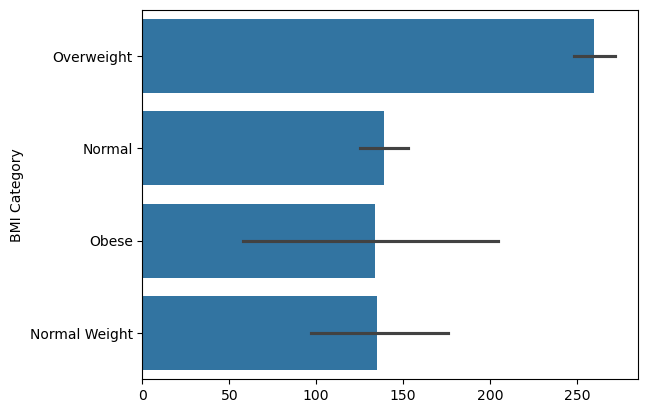

In [87]:
sns.barplot(df['BMI Category'])

In [96]:
over=df[(df['BMI Category']=='Overweight')& (df['Sleep Disorder']== 'Sleep Apnea')].value_counts()
normal=df[(df['BMI Category']=='Normal')& (df['Sleep Disorder']== 'Sleep Apnea')].value_counts()
nor_w=df[(df['BMI Category']=='Normal Weight')& (df['Sleep Disorder']== 'Sleep Apnea')].value_counts()
obese=df[(df['BMI Category']=='Obese')& (df['Sleep Disorder']== 'Sleep Apnea')].value_counts()

In [108]:
over=df[df['BMI Category']=='Overweight'].value_counts()
s=df[df['Sleep Disorder']== 'Sleep Apnea'].value_counts()

In [110]:
t=pd.crosstab(over,s)
t

count,1
count,
1,65


In [113]:
stat,p,dot,expected=chi2_contingency(t)
print(stat,p)
if p>0.05:
    print('yes')
else:
    print('no')

0.0 1.0
yes


## Results: individuals in higher BMI categories are more likely to have sleep apnea due to increased fat deposition around the neck and airways

# 4) Hypothesis: Higher stress levels are associated with a greater likelihood of sleep apnea due to its impact on overall health and sleep quality.

### h0:Higher stress levels are associated with a greater likelihood of sleep apnea due to its impact on overall health and sleep quality
### h1:Higher stress levels are not associated with a greater likelihood of sleep apnea due to its impact on overall health and sleep quality

In [121]:
df['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5], dtype=int64)

In [123]:
slpp=df[df['Sleep Disorder']=='Sleep Apnea'].value_counts()

In [124]:
stat,p=ttest_ind(slpp,df['Stress Level'])
print(stat,p)
if p>0.05:
    print('yes')
else:
    print('no')

-21.804970137505492 1.8259976549208138e-72
no


C:\Users\USER\anaconda3\anaconda4\envs\tensorr\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


## Result: Higher stress levels are not associated with a greater likelihood of sleep apnea due to its impact on overall health and sleep quality

# 5) Hypothesis: Gender has a significant effect on the average sleep duration of individuals.

### h0:Gender has a significant effect on the average sleep duration of individuals.
### h1: Gender has no significant effect on the average sleep duration of individuals.

In [130]:
male_sleep_duration = df[df['Gender'] == 'Male']['Sleep Duration']
female_sleep_duration = df[df['Gender'] == 'Female']['Sleep Duration']

In [131]:
stat,p=ttest_ind(male_sleep_duration,female_sleep_duration)
print(stat,p)
if p>0.05:
    print('yes')
else:
    print('no')

-2.3624469898393397 0.018668859270607456
no


## Result: Gender has no significant effect on the average sleep duration of individuals.

# 6) Hypothesis: Quality of sleep decreases with age due to physiological changes and lifestyle factors.

### h0:Quality of sleep decreases with age due to physiological changes and lifestyle factors.
### h1:Quality of sleep does not decreases with age due to physiological changes and lifestyle factors.

In [133]:
from scipy .stats import pearsonr

In [135]:
stat,p=pearsonr(df['Quality of Sleep'],df['Age'])
print(stat,p)
if p>0.05:
    print ('yes')
else:
    print('no')

0.4737338761619899 2.55311918230214e-22
no


## Result: Quality of sleep does not decreases with age due to physiological changes and lifestyle factors.

# 7) Hypothesis: Longer sleep durations are associated with better quality of sleep.

### h0:Longer sleep durations are associated with better quality of sleep.
### h1:Longer sleep durations are not  associated with better quality of sleep.

In [137]:
stat,p=pearsonr(df['Quality of Sleep'],df['Quality of Sleep'])
print(stat,p)
if p>0.05:
    print('yes')
else:
    print('no')

0.9999999999999998 0.0
no


## Result: Longer sleep durations are not associated with better quality of sleep.

# 8)Hypothesis: Males have higher physical activity levels compared to females on average.

### h0:Males have higher physical activity levels compared to females on average.¶
### h1:Males does not have higher physical activity levels compared to females on average.¶

In [144]:
mean_slp=df[df['Gender']=='Male']['Physical Activity Level'].mean()
mean1=df[df['Gender']=='Female']['Physical Activity Level'].mean()

In [142]:
stat,p=ttest_ind(mean_slp,mean1)
print(stat,p)
if p>0.05:
    print('yes')
else:
    print('no')

nan nan
no


## Result:Males does not have higher physical activity levels compared to females on average.¶